In [705]:
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for Logistic Regression & Confusion Matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [706]:
pd.set_option('display.max_rows', None)

In [707]:
train_data = pd.read_csv("train.csv")

In [708]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [709]:
test_data = pd.read_csv("test.csv")

In [710]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [711]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [712]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [713]:
train_reg = train_data.copy()

In [714]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [715]:
train_data['Surname'] = train_data['Name'].str.split(',').str.get(0)

In [716]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


In [717]:
type(train_data)

pandas.core.frame.DataFrame

In [718]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Surname          0
dtype: int64

In [719]:
train_data.duplicated().sum()

0

In [720]:
len(train_data['Surname'].unique())

667

In [721]:
train_data['Surname'].value_counts()

Andersson                 9
Sage                      7
Goodwin                   6
Panula                    6
Johnson                   6
Carter                    6
Skoog                     6
Rice                      5
Kelly                     4
Harper                    4
Asplund                   4
Hart                      4
Gustafsson                4
Ford                      4
Harris                    4
Palsson                   4
Baclini                   4
Williams                  4
Smith                     4
Fortune                   4
Brown                     4
Lefebre                   4
Johansson                 3
Jensen                    3
Laroche                   3
Navratil                  3
Collyer                   3
Goldsmith                 3
Hoyt                      3
Newell                    3
Taussig                   3
Boulos                    3
Elias                     3
Flynn                     3
Bourke                    3
Van Impe            

In [722]:
train_data['Cabin'].value_counts()

C23 C25 C27        4
G6                 4
B96 B98            4
F2                 3
C22 C26            3
E101               3
D                  3
F33                3
C78                2
B18                2
C92                2
B58 B60            2
C123               2
D20                2
B77                2
E33                2
F G73              2
D36                2
C52                2
D17                2
D26                2
E24                2
C93                2
C125               2
D35                2
B57 B59 B63 B66    2
B20                2
D33                2
E121               2
F4                 2
E44                2
C68                2
B5                 2
E25                2
C83                2
E67                2
B51 B53 B55        2
C124               2
B28                2
B35                2
C2                 2
B49                2
B22                2
C126               2
C65                2
E8                 2
B82 B84            1
D19          

In [723]:
train_data.loc[train_data.Cabin == 'B96 B98']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0,B96 B98,S,Carter
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0,B96 B98,S,Carter
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0,B96 B98,S,Carter
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0,B96 B98,S,Carter


It looks like the first letter of Cabin designates the cabin section.  I'll go ahead and create a new column with just this letter.

In [724]:
train_data['CabinSection'] = train_data['Cabin'].str[0:1]

In [725]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,CabinSection
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,NaN


In [726]:
train_data['CabinSection'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: CabinSection, dtype: int64

Text(0.5, 1.0, 'Survival by CabinSection')

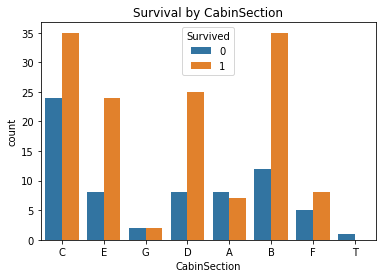

In [727]:
sns.countplot(data=train_data, x="CabinSection", hue="Survived")
plt.title("Survival by CabinSection")

In my initial look at survivability by cabin section, nearly all sections had more survivors than people who died.  Even passengers in cabin sections G and A had a fair chance at survivability.  But on further examination, there are 687 missing values for CabinSection, the vast majority of entries in the data set.  We should look at survivability for those sections that were unknown, which I relabel to U.

In [728]:
train_data['CabinSection'] = train_data['CabinSection'].fillna('U')

In [729]:
train_data['CabinSection'].value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: CabinSection, dtype: int64

Text(0.5, 1.0, 'Survival by CabinSection')

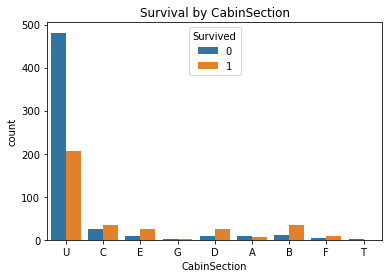

In [730]:
sns.countplot(data=train_data, x="CabinSection", hue="Survived")
plt.title("Survival by CabinSection")

The passengers of unknown CabinSection provenance (which I labeled 'U') had poor survivability.  I wonder why that is?  But for modeling purposes, I will experiment with keeping the missing CabinSection entries as labeled as U.

In [731]:
s = train_data['Survived'].value_counts(dropna=False)

In [732]:
s

0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Survival breakdown')

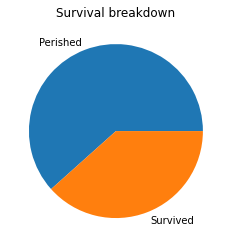

In [733]:
fig, ax = plt.subplots()
ax.pie(s, labels=['Perished', 'Survived'])
plt.title("Survival breakdown")

In [734]:
train_data['Survived'].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [735]:
len(train_data['Ticket'].unique())

681

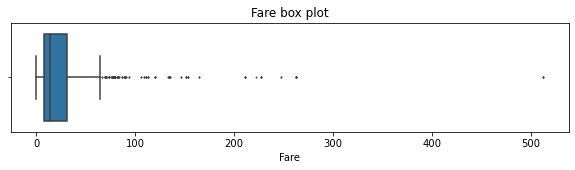

In [736]:
plt.figure(figsize=(10,2))
sns.boxplot(x=train_data['Fare'], fliersize=1)
plt.title('Fare box plot');

Fares above 65 or so are considered outliers.

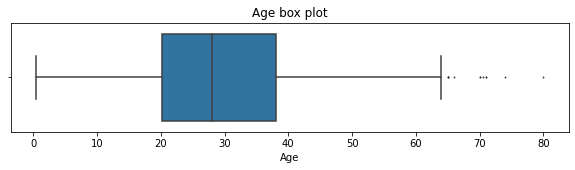

In [737]:
plt.figure(figsize=(10,2))
sns.boxplot(x=train_data['Age'], fliersize=1)
plt.title('Age box plot');

Above around 64 years old are where the outliers are.

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

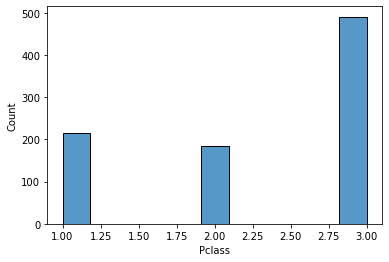

In [738]:
sns.histplot(train_data, x="Pclass")

In [739]:
s = train_data['Pclass'].value_counts()

In [740]:
s

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [741]:
type(s)

pandas.core.series.Series

Text(0.5, 1.0, 'Class breakdown')

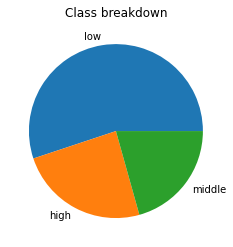

In [742]:
fig, ax = plt.subplots()
ax.pie(s, labels=['low', 'high', 'middle'])
plt.title("Class breakdown")

Text(0.5, 1.0, 'Survival by Class')

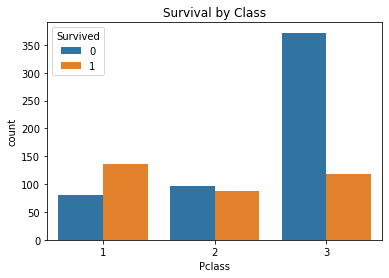

In [743]:
sns.countplot(data=train_data, x="Pclass", hue="Survived")
plt.title("Survival by Class")

Passengers in 1st class had the highest probability of surviving.  Passengers in 3rd class had the poorest survival rates.  Passengers in 2nd class were in the middle.  The higher your class was on the ship, the higher your survivability.  

In [744]:
#train_data[train_data['Pclass'] == 3]['Survived'].value_counts(dropna = False)

Text(0.5, 1.0, 'Number of males and females')

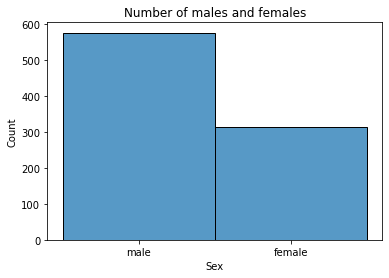

In [745]:
sns.histplot(train_data, x="Sex")
plt.title("Number of males and females")

In [746]:
s = train_data["Sex"].value_counts()

In [747]:
s

male      577
female    314
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Sex breakdown')

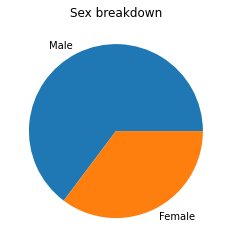

In [748]:
fig, ax = plt.subplots()
ax.pie(s, labels=['Male', 'Female'])
plt.title("Sex breakdown")

Text(0.5, 1.0, 'Survival by Sex')

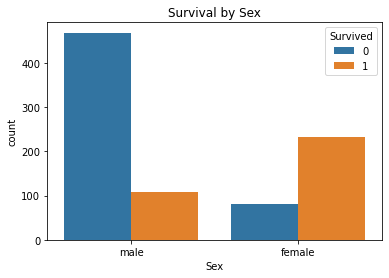

In [749]:
sns.countplot(data=train_data, x="Sex", hue="Survived")
plt.title("Survival by Sex")

Females had a much higher probability of surviving than males.  

In [750]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,CabinSection
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,U


Text(0.5, 1.0, 'Survival by Port of Embarkation')

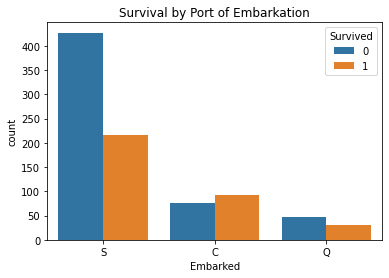

In [751]:
sns.countplot(data = train_data, x="Embarked", hue="Survived")
plt.title("Survival by Port of Embarkation")

Passengers that embarked from C (Cherbourg) had the best chance of surviving.  Passengers that embarked from S (Southampton) had the worst chance of surviving.  Passengers that embarked from Q (Queenstown) were inbetween.

Text(0.5, 1.0, 'Port of Embarkation')

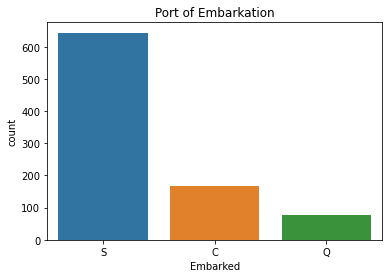

In [752]:
sns.countplot(data = train_data, x="Embarked")
plt.title("Port of Embarkation")

In [753]:
s = train_data['Embarked'].value_counts()

Text(0.5, 1.0, 'Port of Embarkation')

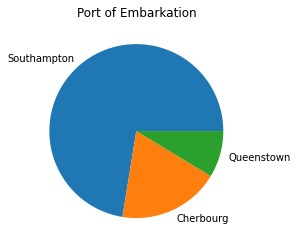

In [754]:
fig, ax = plt.subplots()
ax.pie(s, labels=['Southampton', 'Cherbourg', 'Queenstown'])
plt.title("Port of Embarkation")

Text(0.5, 1.0, 'Class breakdown by Port of Embarkation')

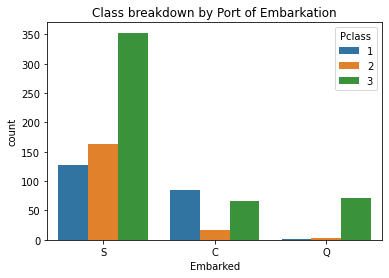

In [755]:
sns.countplot(data = train_data, x="Embarked", hue="Pclass")
plt.title("Class breakdown by Port of Embarkation")

C (Cherbourg) had the highest proportion of 1st class passengers.  Southampton had the highest proportion of 3rd class passengers.  

There are 2 null values in the Embarked column.  I'll change these values to "U".

In [756]:
train_data['Embarked'] = train_data['Embarked'].fillna('U')

In [757]:
train_data[train_data['Embarked'] == 'U']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,CabinSection
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,U,Icard,B
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,U,Stone,B


The two passengers who Embarked from unknown provenance both Survived.  They paid the same Fare, had the same Ticket number, and shared the same Cabin.  Both were female, and were not related.

In [758]:
train_data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          0
Surname           0
CabinSection      0
dtype: int64

Text(0.5, 1.0, 'Survival by Fare')

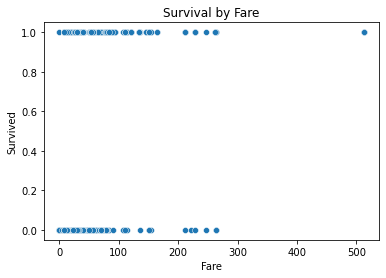

In [759]:
sns.scatterplot(data=train_data, x="Fare", y="Survived")
plt.title("Survival by Fare")

Text(0.5, 1.0, 'Fare box plot based on survival')

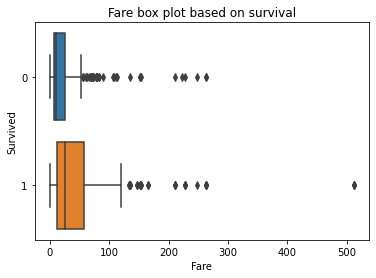

In [760]:
sns.boxplot(data=train_data, x='Fare', y="Survived", orient='h')
plt.title("Fare box plot based on survival")

Survivors tend to have paid more for their fares.

In [761]:
def categorize_age(age):
    if age <= 1:
        return 'Infant'
    elif age < 13:
        return 'Child'
    elif age < 20:
        return 'Teen'
    elif age < 55:
        return 'Adult'
    elif age >= 55:
        return 'Senior'
    else:
        return age
        

train_data['AgeGroup'] = train_data['Age'].apply(categorize_age)



In [762]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,CabinSection,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,U,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,U,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,C,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,U,Adult


Text(0.5, 1.0, 'Survival by AgeGroup')

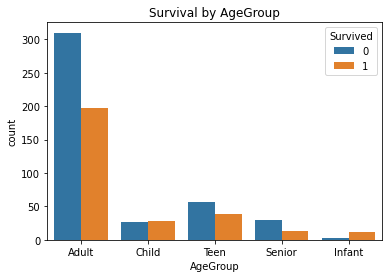

In [763]:
sns.countplot(data=train_data, x="AgeGroup", hue="Survived")
plt.title("Survival by AgeGroup")

Children and Infants had the best survivability rates.  Seniors fared the worst.

Text(0.5, 1.0, 'Age Groups')

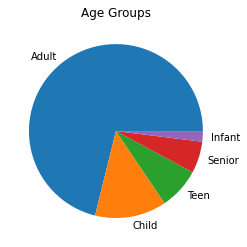

In [764]:
fig, ax = plt.subplots()
ax.pie(train_data["AgeGroup"].value_counts(), labels=['Adult', 'Child', 'Teen', 'Senior', 'Infant'])
plt.title("Age Groups")

There are 177 missing values for Age (and Age Group).  I am including Age Group in the model.  I'll give the null (missing values) in Age Group a value of "Unknown".

In [765]:
train_data['AgeGroup'] = train_data['AgeGroup'].fillna('Unknown')

In [766]:
s = train_data['AgeGroup'].value_counts(dropna = False)
s

Adult      508
Unknown    177
Teen        95
Child       55
Senior      42
Infant      14
Name: AgeGroup, dtype: int64

Text(0.5, 1.0, 'Survival by AgeGroup')

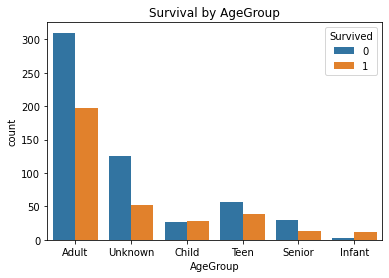

In [767]:
sns.countplot(data=train_data, x="AgeGroup", hue="Survived")
plt.title("Survival by AgeGroup")

Passengers of Unknown Age did not fair well in Survivability.

In [768]:
len(train_data['Fare'].unique())

248

In [769]:
s = train_data[train_data['Pclass'] == 1]['Fare']

In [770]:
print(s)

1       71.2833
3       53.1000
6       51.8625
11      26.5500
23      35.5000
27     263.0000
30      27.7208
31     146.5208
34      82.1708
35      52.0000
52      76.7292
54      61.9792
55      35.5000
61      80.0000
62      83.4750
64      27.7208
83      47.1000
88     263.0000
92      61.1750
96      34.6542
97      63.3583
102     77.2875
110     52.0000
118    247.5208
124     77.2875
136     26.2833
137     53.1000
139     79.2000
151     66.6000
155     61.3792
166     55.0000
168     25.9250
170     33.5000
174     30.6958
177     28.7125
185     50.0000
187     26.5500
194     27.7208
195    146.5208
209     31.0000
215    113.2750
218     76.2917
224     90.0000
230     83.4750
245     90.0000
248     52.5542
252     26.5500
256     79.2000
257     86.5000
258    512.3292
262     79.6500
263      0.0000
268    153.4625
269    135.6333
270     31.0000
273     29.7000
275     77.9583
284     26.0000
290     78.8500
291     91.0792
295     27.7208
297    151.5500
298     

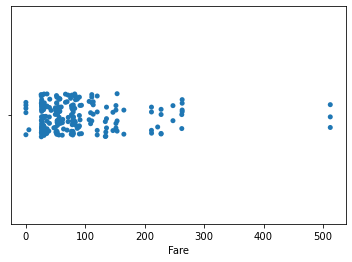

In [771]:
sns.stripplot(x = s)
plt.show()

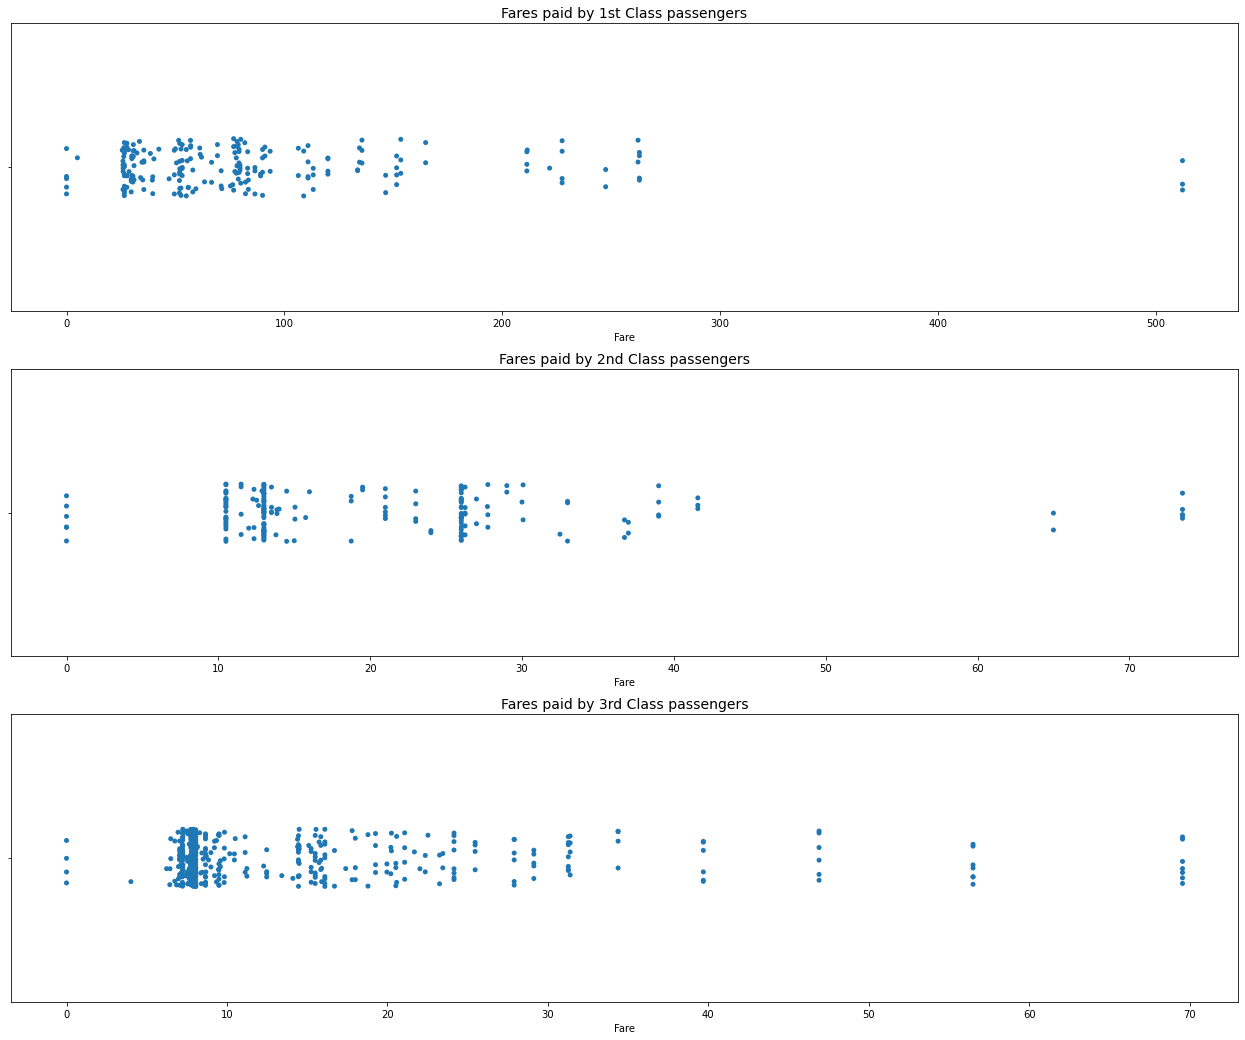

In [772]:
fig, ax = plt.subplots(3, 1, figsize = (22,18))


sns.stripplot(x=train_data[train_data['Pclass'] == 1]['Fare'], ax=ax[0])
ax[0].set_title("Fares paid by 1st Class passengers", fontsize='14')

sns.stripplot(x=train_data[train_data['Pclass'] == 2]['Fare'], ax=ax[1])
ax[1].set_title("Fares paid by 2nd Class passengers", fontsize='14')

sns.stripplot(x=train_data[train_data['Pclass'] == 3]['Fare'], ax=ax[2])
ax[2].set_title("Fares paid by 3rd Class passengers", fontsize='14')

plt.show()

No 3rd Class passenger paid more than 70.  The maximum that a 2nd Class passenger paid was around 75.  Meanwhile, there are many 1st Class passengers that paid more than 100, with some paying over 500!

Text(0.5, 1.0, 'Box plot of Fare by Class')

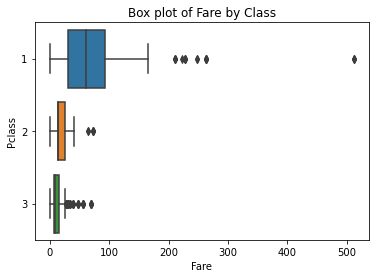

In [773]:
sns.boxplot(data=train_data, x='Fare', y="Pclass", orient='h')
plt.title("Box plot of Fare by Class")

There is a correlation between Fare and Class.  The higher the Class, the higher the Fare paid.

Text(0.5, 1.0, 'Box plot of Fare by Class')

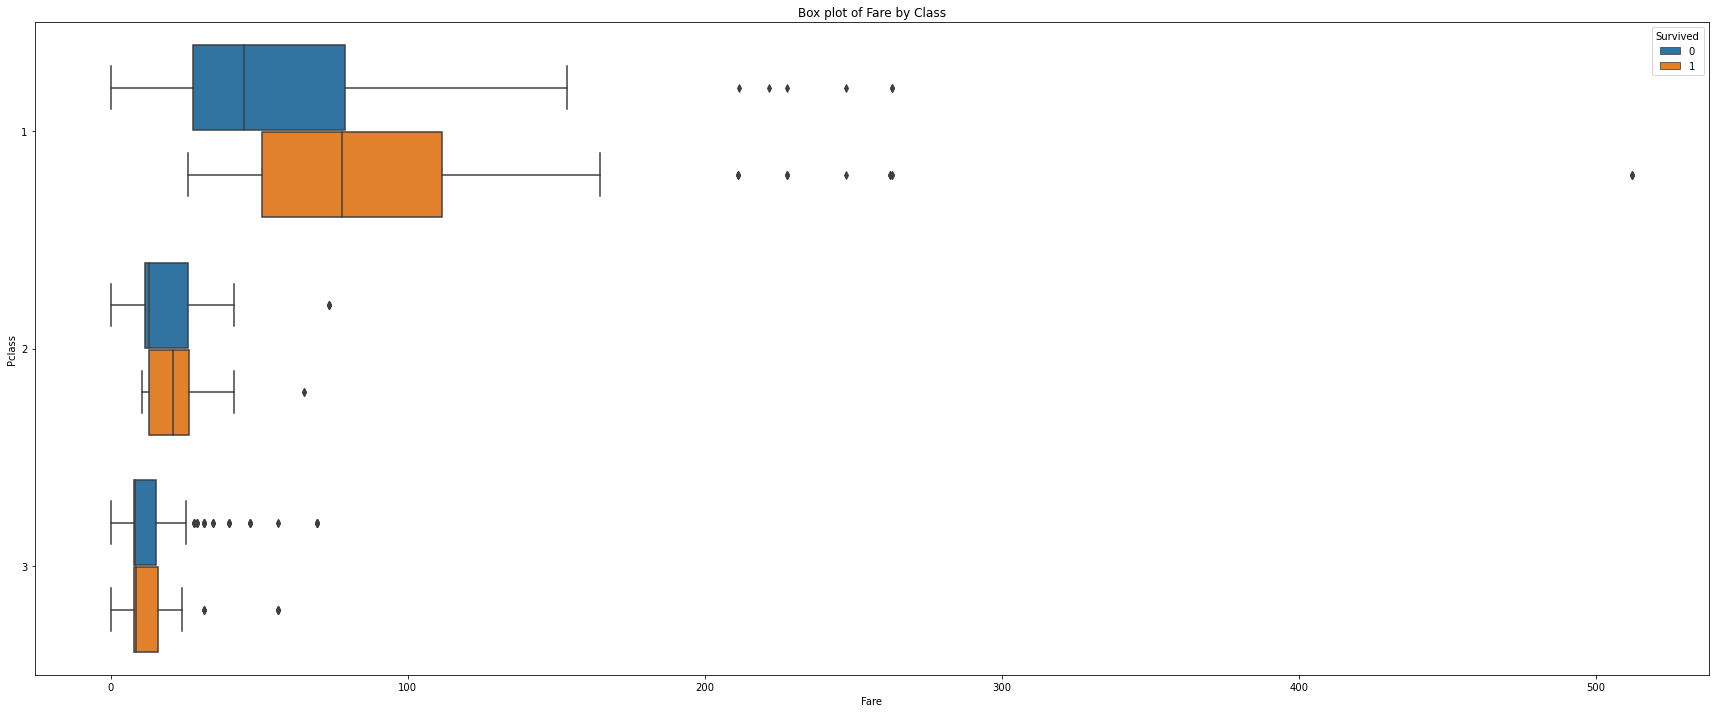

In [774]:
plt.figure(figsize=(30,12))
sns.boxplot(data=train_data, x='Fare', y="Pclass", hue="Survived", orient='h')
plt.title("Box plot of Fare by Class")

In [775]:
train_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Text(0.5, 1.0, 'Survival by number of siblings and spouses')

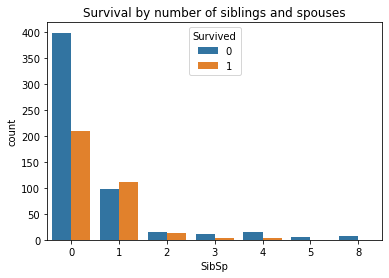

In [776]:
sns.countplot(data=train_data, x="SibSp", hue="Survived")
plt.title("Survival by number of siblings and spouses")

Travelling with one other sibling or spouse had the highest survivability.  Travelling with 2 looks pretty good too.

In [777]:
train_data['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

Text(0.5, 1.0, 'Survival by number of parents and children')

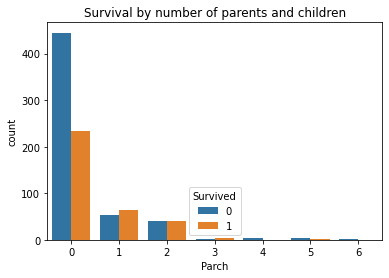

In [778]:
sns.countplot(data=train_data, x="Parch", hue="Survived")
plt.title("Survival by number of parents and children")

Travelling with 1, 2, or 3 parents or children had the best survivability.

In [779]:
train_data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          0
Surname           0
CabinSection      0
AgeGroup          0
dtype: int64

As it appears that Age and Embarked may have a correlation with Survived, I will eliminate all rows containing null for those columns.  Null values in the Cabin column are not as important as I will not include them in my model.

In [780]:
train_data.dropna(subset=['Age'], inplace=True)

In [781]:
train_data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           529
Embarked          0
Surname           0
CabinSection      0
AgeGroup          0
dtype: int64

In [782]:
train_data.dropna(subset=['Cabin'], inplace=True)

In [783]:
train_data.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
Surname         0
CabinSection    0
AgeGroup        0
dtype: int64

After deleting rows with nulls, recheck for outliers

In [784]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,CabinSection,AgeGroup
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,C,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,C,Adult
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,McCarthy,E,Adult
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Sandstrom,G,Child
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Bonnell,C,Senior


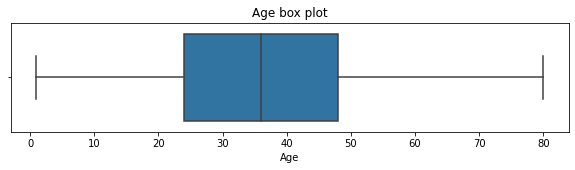

In [785]:
plt.figure(figsize=(10,2))
sns.boxplot(x=train_data['Age'], fliersize=1)
plt.title('Age box plot');

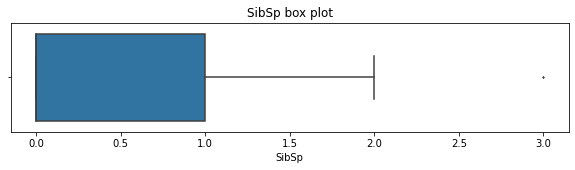

In [786]:
plt.figure(figsize=(10,2))
sns.boxplot(x=train_data['SibSp'], fliersize=1)
plt.title('SibSp box plot');

In [787]:
train_data['SibSp'].value_counts()

0    112
1     64
2      6
3      3
Name: SibSp, dtype: int64

In [788]:
train_data = train_data[train_data['SibSp'] <= 2.0]

In [789]:
train_data['SibSp'].value_counts()

0    112
1     64
2      6
Name: SibSp, dtype: int64

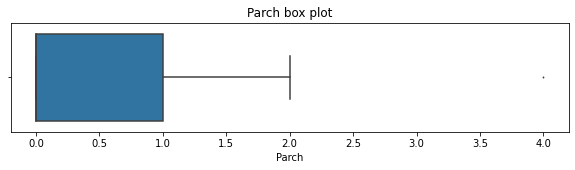

In [790]:
plt.figure(figsize=(10,2))
sns.boxplot(x=train_data['Parch'], fliersize=1)
plt.title('Parch box plot');

In [791]:
train_data = train_data[train_data['Parch'] <= 2.0]

In [792]:
train_data['Parch'].value_counts()

0    124
1     37
2     20
Name: Parch, dtype: int64

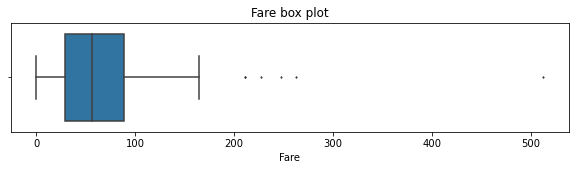

In [793]:
plt.figure(figsize=(10,2))
sns.boxplot(x=train_data['Fare'], fliersize=1)
plt.title('Fare box plot');

In [794]:
percentile25 = train_data['Fare'].quantile(.25)

percentile75 = train_data['Fare'].quantile(.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(f"Range of non-outlier values: ({lower_limit}, {upper_limit})")

outliers = train_data[(train_data['Fare'] > upper_limit)| (train_data['Fare'] < lower_limit)]
print(len(outliers))

Range of non-outlier values: (-59.4063, 178.21050000000002)
12


In [795]:
train_data = train_data[train_data['Fare'] <= 178.21050000000002]

In [796]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,CabinSection,AgeGroup
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,C,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,C,Adult
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,McCarthy,E,Adult
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Sandstrom,G,Child
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Bonnell,C,Senior


In [797]:
# train_data = pd.get_dummies(data=train_data, columns=['Sex', 'Cabin', 'Embarked', 'AgeGroup'])
train_data = pd.get_dummies(data=train_data, columns=['Sex', 'Embarked', 'AgeGroup', 'CabinSection'])
# dropped Cabin from inclusion in columns since it was not working with the test file / data

In [798]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Surname,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,AgeGroup_Adult,AgeGroup_Child,AgeGroup_Infant,AgeGroup_Senior,AgeGroup_Teen,CabinSection_A,CabinSection_B,CabinSection_C,CabinSection_D,CabinSection_E,CabinSection_F,CabinSection_G,CabinSection_T
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,Cumings,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,Futrelle,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,McCarthy,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,PP 9549,16.7000,G6,Sandstrom,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
11,12,1,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,C103,Bonnell,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [799]:
train_data['FirstClass'] = np.where(train_data['Pclass']== 1, 1, 0)

In [800]:
train_data['SecondClass'] = np.where(train_data['Pclass']== 2, 1, 0)

In [801]:
train_data['ThirdClass'] = np.where(train_data['Pclass']== 3, 1, 0)

In [802]:
pd.set_option('display.max_columns', None)

In [803]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Surname,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,AgeGroup_Adult,AgeGroup_Child,AgeGroup_Infant,AgeGroup_Senior,AgeGroup_Teen,CabinSection_A,CabinSection_B,CabinSection_C,CabinSection_D,CabinSection_E,CabinSection_F,CabinSection_G,CabinSection_T,FirstClass,SecondClass,ThirdClass
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,Cumings,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,Futrelle,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,McCarthy,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,PP 9549,16.7000,G6,Sandstrom,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,C103,Bonnell,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0


In [804]:
X = train_data.drop(columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'Ticket', 'Surname', 'Cabin'])

In [805]:
y = train_data['Survived']

In [806]:
model = LogisticRegression(random_state=42, max_iter=500)

model.fit(X, y)

LogisticRegression(max_iter=500, random_state=42)

In [807]:
test = pd.read_csv('test.csv')

In [808]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [809]:
test['CabinSection'] = test['Cabin'].str[0:1]

In [810]:
test.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age              86
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin           327
Embarked          0
CabinSection    327
dtype: int64

In [812]:
test['CabinSection'] = test['CabinSection'].fillna('U')

In [702]:
#test_age_mean = test['Age'].mean()

In [703]:
#test['Age'] = test['Age'].fillna(test_age_mean)

In [813]:
test['AgeGroup'] = test['Age'].apply(categorize_age)

In [814]:
test['AgeGroup'] = test['AgeGroup'].fillna('Unknown')

In [815]:
test_fare_mean = test['Fare'].mean()

In [816]:
test['Fare'] = test['Fare'].fillna(test_fare_mean)

In [817]:
test.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age              86
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           327
Embarked          0
CabinSection      0
AgeGroup          0
dtype: int64

In [818]:
# test = pd.get_dummies(data=test, columns=['Sex', 'Cabin', 'Embarked', 'AgeGroup'])
test = pd.get_dummies(data=test, columns=['Sex', 'Embarked', 'AgeGroup', 'CabinSection'])

In [819]:
test['FirstClass'] = np.where(test['Pclass']== 1, 1, 0)

In [820]:
test['SecondClass'] = np.where(test['Pclass']== 2, 1, 0)

In [821]:
test['ThirdClass'] = np.where(test['Pclass']== 3, 1, 0)

In [822]:
X_test = test.drop(columns = ['PassengerId', 'Pclass', 'Name', 'Age', 'Ticket', 'Cabin'])

In [823]:
y_preds = model.predict(X_test)

In [ ]:
#y_preds

In [824]:
d = {'PassengerId': test['PassengerId'], 'Survived': y_preds}

In [825]:
submission = pd.DataFrame(data=d)

In [826]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [827]:
submission.to_csv('submission2.csv', index=False)